In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import warnings 
warnings.filterwarnings("ignore")

In [156]:
df=pd.read_csv('Email_Data.csv')

In [157]:
df.head()

,File Name,From,Subject,Body,Label,Final_Body
0,10425.txt,steven.kean@enron.com,Translation of articles,j kean hou ees karen j cc translation articles...,1,kean karen translat articl karen denn corp and...
1,106296.txt,drew.fossum@enron.com,TW Gas Sales,cc bcc anticipation potential litigation invol...,1,anticip potenti litig involv oper activ pleas ...
2,106298.txt,drew.fossum@enron.com,TW Gas Sales,cc bcc julia steve questions sent darrell tw c...,1,julia steve question sent darrel border line p...
3,106588.txt,drew.fossum@enron.com,TW Gas Sales,cc bcc julia steve questions sent darrell tw c...,1,julia steve question sent darrel border line p...
4,106590.txt,drew.fossum@enron.com,TW Gas Sales,cc bcc anticipation potential litigation invol...,1,anticip potenti litig involv oper activ pleas ...


# EDA

<AxesSubplot:xlabel='Label', ylabel='Count'>

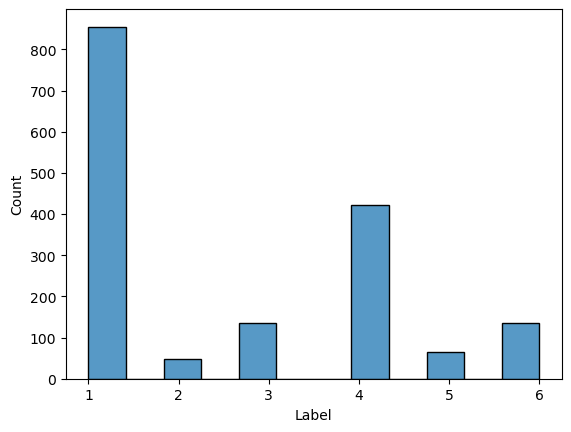

In [158]:
sns.histplot(df['Label'])

histogram is plotted to check the count of different output labels
1) Company Business, Strategy, etc.
2) Purely Personal
3) Personal but in professional context (e.g., it was good working with you)
4) Logistic Arrangements (meeting scheduling, technical support, etc)
5) Employment arrangements (job seeking, hiring, recommendations, etc)
6) Document editing/checking (collaboration)

In [159]:
df['Label'].value_counts()

1    855
4    422
3    135
6    135
5     64
2     48
Name: Label, dtype: int64

checking the count of different labels in the data

In [160]:
df['From'].value_counts()

 steven.kean@enron.com      968
 j.kaminski@enron.com       166
 john.shelk@enron.com        89
 miyung.buster@enron.com     31
 michelle.cash@enron.com     21
                           ... 
 peggy.mahoney@enron.com      1
 dsgeorge@firstworld.net      1
 mmcgown@velaw.com            1
 jane.wilson@enron.com        1
 jacton@crai.com              1
Name: From, Length: 171, dtype: int64

Checking how many emails were sent by each person

<AxesSubplot:xlabel='Label', ylabel='Count'>

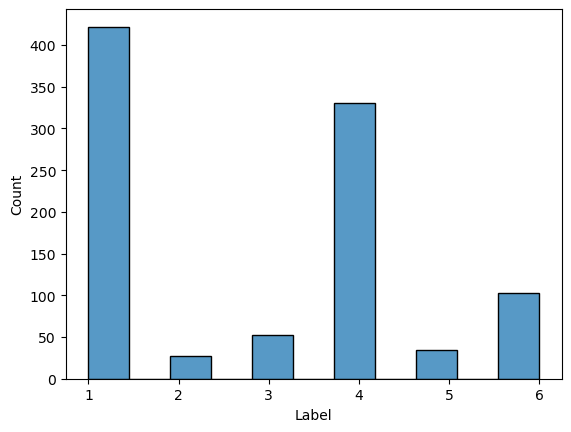

In [161]:
sns.histplot(df[df['From']==' steven.kean@enron.com']['Label'])

As majority is send by steven kean, checking the label of emails which steven kean has sent

In [162]:
(df[df['From']==' steven.kean@enron.com']['Label']).value_counts()

1    422
4    330
6    103
3     52
5     34
2     27
Name: Label, dtype: int64

Checking count of different labels so emails sent by steven kean

In [163]:
np.mean(df['Final_Body'].str.len())

3374.4581072935503

average length of email body

In [164]:
entire_text = ' '.join([text for text in df['Final_Body']])

In [165]:
all_words = [word for  text in df['Final_Body'] for word in text.split()]

In [166]:
len(all_words)

837121

In [167]:
all_words = list(set(all_words))

In [168]:
len(all_words)

17249

Wordclouds are plotted to check most common words in different category emails

(-0.5, 799.5, 499.5, -0.5)

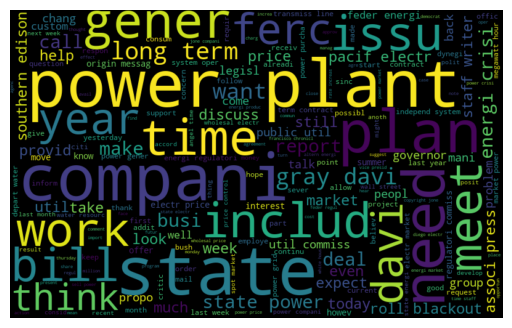

In [169]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(entire_text)
plt.figure(figsize=(7,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

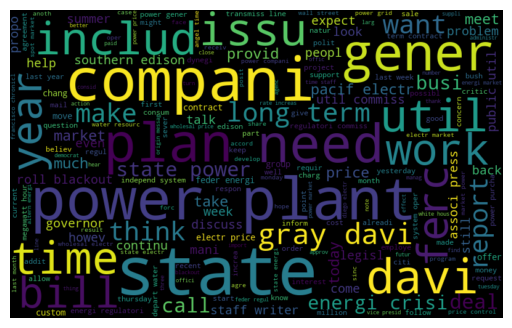

In [170]:
Category_1 =' '.join([text for text in df['Final_Body'][df['Label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Category_1)
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

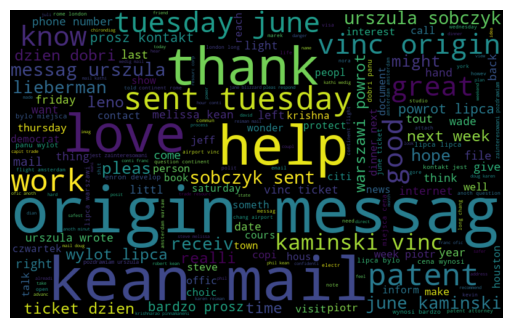

In [171]:
Category_2 =' '.join([text for text in df['Final_Body'][df['Label'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Category_2)
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

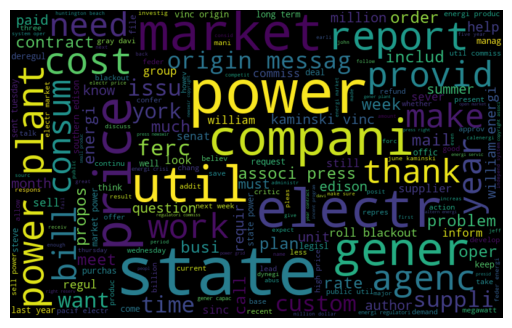

In [172]:
Category_3 =' '.join([text for text in df['Final_Body'][df['Label'] == 3]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Category_3)
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

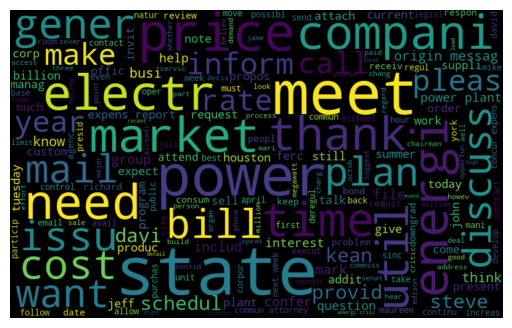

In [173]:
Category_4 =' '.join([text for text in df['Final_Body'][df['Label'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Category_4)
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

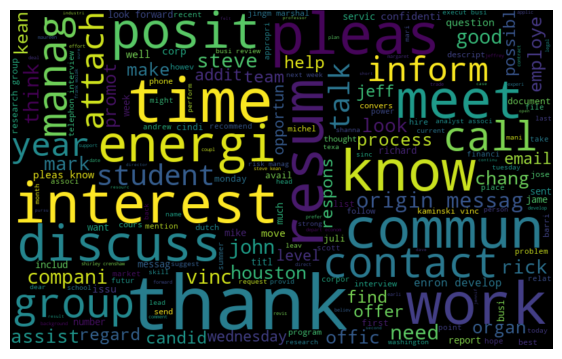

In [174]:
Category_5 =' '.join([text for text in df['Final_Body'][df['Label'] == 5]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Category_5)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

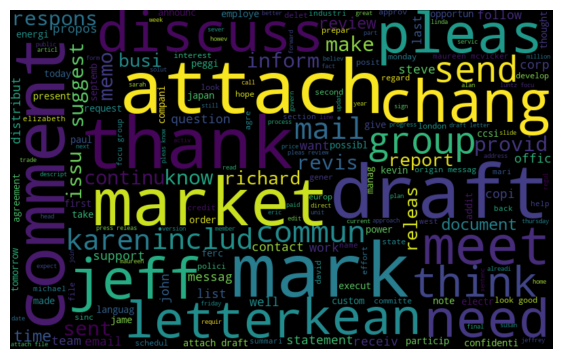

In [175]:
Category_6 =' '.join([text for text in df['Final_Body'][df['Label'] == 6]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Category_6)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

# Modelling

Three modelling criteria were taken. 1) BoW model, 2) TfIDF model, 3) Word2Vec model

In [176]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

In [177]:
bow_vectorizer = CountVectorizer(max_features=10000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Final_Body'])
bow.shape

(1659, 10000)

Bow model is generated and maximum features is taken as 10000 so that majority of text data can be trained.

In [178]:
bow_vectorizer.vocabulary_

{'kean': 4734,
 'karen': 4716,
 'translat': 9119,
 'articl': 460,
 'denn': 2305,
 'corp': 1975,
 'andrew': 324,
 'iona': 4525,
 'plenti': 6643,
 'good': 3721,
 'houston': 4171,
 'input': 4420,
 'europ': 3029,
 'excel': 3067,
 'gener': 3611,
 'result': 7405,
 'nice': 5939,
 'pictur': 6584,
 'origin': 6199,
 'copi': 1960,
 'asap': 464,
 'organis': 6196,
 'reprint': 7342,
 'pleas': 6638,
 'know': 4812,
 'mani': 5279,
 'like': 5050,
 'thank': 8907,
 'morrison': 5718,
 'capit': 1298,
 'trade': 9089,
 'resourc': 7385,
 'anticip': 358,
 'potenti': 6723,
 'litig': 5093,
 'involv': 4521,
 'oper': 6162,
 'activ': 75,
 'prepar': 6786,
 'analysi': 312,
 'reason': 7136,
 'sale': 7661,
 'excess': 3069,
 'natur': 5843,
 'border': 965,
 'awar': 575,
 'sever': 7897,
 'inform': 4394,
 'pressur': 6802,
 'basic': 674,
 'specif': 8290,
 'explan': 3119,
 'includ': 4333,
 'follow': 3383,
 'volum': 9595,
 'consider': 1881,
 'make': 5256,
 'necessari': 5863,
 'sell': 7839,
 'process': 6856,
 'determin': 2373,


In [179]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Final_Body'])
tfidf.shape

(1659, 10000)

Term Frequency, Inverse Document Frequency data is generated for all texts and maximum features is restricted to 10000

In [180]:
tokenized_email = df['Final_Body'].apply(lambda x: x.split())

Word2Vec model is generated using all words available in the data. 

In [181]:
model_w2v = gensim.models.Word2Vec(tokenized_email,vector_size=200,sg = 1,)

model_w2v.train(tokenized_email, total_examples= len(df['Final_Body']), epochs=20)

(14563758, 16742420)

In [182]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
                         
            continue
    if count != 0:
        vec /= count
    return vec

The above function takes the data from email body and gives a column vector of desired dimension which contains weightage of all words in data

In [183]:
tokenized_email = list(tokenized_email)

In [184]:
wordvec_arrays = np.zeros((len(tokenized_email), 200))

for i in range(len(tokenized_email)):
    wordvec_arrays[i,:] = word_vector(tokenized_email[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(1659, 200)

Finally Word2Vec model is generated using 200 dimensions only

# Logistic Regression 

### Bow Model

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

Importing Libraries

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(bow,df['Label'],random_state=42,test_size=0.2)

Making Train test split in 80:20 ratio

In [187]:
logmodel_LR = LogisticRegression(multi_class='multinomial')

In [188]:
logmodel_LR.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [189]:
prediction = logmodel_LR.predict(X_test) 

creating model instance and fitting traing data to it and finally making predictions using test data

In [190]:
accuracy_score(Y_test,prediction)

0.6746987951807228

In [191]:
confusion_matrix(Y_test,prediction)

array([[140,   0,   8,  21,   2,   7],
       [  1,   3,   4,   2,   0,   0],
       [  7,   0,   6,   9,   0,   0],
       [ 18,   0,   3,  60,   1,   2],
       [  3,   0,   1,   1,   5,   0],
       [ 15,   0,   0,   3,   0,  10]], dtype=int64)

In [192]:
pd.DataFrame(classification_report(Y_test,prediction,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.760870,1.000000,0.272727,0.625000,0.625000,0.526316,0.674699,0.634985,0.677475
recall,0.786517,0.300000,0.272727,0.714286,0.500000,0.357143,0.674699,0.488445,0.674699
f1-score,0.773481,0.461538,0.272727,0.666667,0.555556,0.425532,0.674699,0.525917,0.667968
support,178.000000,10.000000,22.000000,84.000000,10.000000,28.000000,0.674699,332.000000,332.000000


Calculating performance metrics to evaluate model performance

### Tfidf Model

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf,df['Label'],random_state=42,test_size=0.2)

Making Train test split in 80:20 ratio

In [194]:
logmodel = LogisticRegression(multi_class='multinomial')

In [195]:
logmodel.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [196]:
prediction = logmodel.predict(X_test)

creating model instance and fitting traing data to it and finally making predictions using test data

In [197]:
accuracy_score(Y_test,prediction)

0.6716867469879518

In [198]:
confusion_matrix(Y_test,prediction)

array([[165,   0,   2,   9,   0,   2],
       [  6,   2,   2,   0,   0,   0],
       [ 13,   0,   2,   7,   0,   0],
       [ 34,   0,   0,  50,   0,   0],
       [  8,   0,   1,   1,   0,   0],
       [ 23,   0,   0,   1,   0,   4]], dtype=int64)

In [199]:
pd.DataFrame(classification_report(Y_test,prediction,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.662651,1.000000,0.285714,0.735294,0.0,0.666667,0.671687,0.558388,0.646593
recall,0.926966,0.200000,0.090909,0.595238,0.0,0.142857,0.671687,0.325995,0.671687
f1-score,0.772834,0.333333,0.137931,0.657895,0.0,0.235294,0.671687,0.356214,0.619830
support,178.000000,10.000000,22.000000,84.000000,10.0,28.000000,0.671687,332.000000,332.000000


Calculating performance metrics to evaluate model performance

### Word2Vec Model

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(wordvec_df,df['Label'],random_state=42,test_size=0.2)

Making Train test split in 80:20 ratio

In [201]:
logmodel = LogisticRegression(multi_class='multinomial')

In [202]:
logmodel.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [203]:
prediction = logmodel.predict(X_test)

creating model instance and fitting traing data to it and finally making predictions using test data

In [204]:
accuracy_score(Y_test,prediction)

0.6596385542168675

In [205]:
confusion_matrix(Y_test,prediction)

array([[162,   0,   2,   9,   0,   5],
       [  2,   3,   3,   2,   0,   0],
       [ 12,   1,   3,   6,   0,   0],
       [ 32,   1,   1,  47,   1,   2],
       [  9,   0,   1,   0,   0,   0],
       [ 20,   0,   1,   3,   0,   4]], dtype=int64)

In [206]:
pd.DataFrame(classification_report(Y_test,prediction,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.683544,0.6,0.272727,0.701493,0.0,0.363636,0.659639,0.436900,0.610777
recall,0.910112,0.3,0.136364,0.559524,0.0,0.142857,0.659639,0.341476,0.659639
f1-score,0.780723,0.4,0.181818,0.622517,0.0,0.205128,0.659639,0.365031,0.617481
support,178.000000,10.0,22.000000,84.000000,10.0,28.000000,0.659639,332.000000,332.000000


Calculating performance metrics to evaluate model performance

#### Achieved Highest accuracy of 67.46% using Logistic Regression with BoW Model

# Naive Bayes

In [207]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

### Bow Model

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(bow,df['Label'],random_state=42,test_size=0.2)

In [209]:
model = MultinomialNB()

model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(prediction,Y_test)

0.5150602409638554

In [210]:
model = BernoulliNB()

model.fit(X_train.toarray(),Y_train)

prediction = model.predict(X_test.toarray())

accuracy_score(prediction,Y_test)

0.42771084337349397

In [211]:
model = GaussianNB()

model.fit(X_train.toarray(),Y_train)

prediction = model.predict(X_test.toarray())

accuracy_score(prediction,Y_test)

0.5813253012048193

### Tfidf Model

In [212]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf,df['Label'],random_state=42,test_size=0.2)

In [213]:
model = MultinomialNB()

model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(prediction,Y_test)

0.5873493975903614

In [214]:
model = BernoulliNB()

model.fit(X_train.toarray(),Y_train)

prediction = model.predict(X_test.toarray())

accuracy_score(prediction,Y_test)

0.42771084337349397

In [215]:
model = GaussianNB()

model.fit(X_train.toarray(),Y_train)

prediction = model.predict(X_test.toarray())

accuracy_score(prediction,Y_test)

0.5813253012048193

### Word2Vec Model

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(wordvec_df,df['Label'],random_state=42,test_size=0.2)

In [217]:
model_BNB = BernoulliNB()

model_BNB.fit(X_train,Y_train)

prediction = model_BNB.predict(X_test)

accuracy_score(prediction,Y_test)

0.6114457831325302

In [218]:
model = GaussianNB()

model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(prediction,Y_test)

0.5391566265060241

#### Achieved Highest accuracy of 61.14% using Naive Bayes (BernoulliNB) with Word2Vec Model

# Random Forest

In [219]:
from sklearn.ensemble import RandomForestClassifier

### Bow Model 

In [291]:
X_train, X_test, Y_train, Y_test = train_test_split(bow,df['Label'],random_state=42,test_size=0.2)

In [292]:
model_RF = RandomForestClassifier()

In [293]:
model_RF.fit(X_train,Y_train)

prediction = model_RF.predict(X_test)

accuracy_score(Y_test,prediction)

0.6746987951807228

### Tfidf Model

In [294]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf,df['Label'],random_state=42,test_size=0.2)

In [295]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(Y_test,prediction)

0.6686746987951807

### Word2Vec Model

In [296]:
X_train, X_test, Y_train, Y_test = train_test_split(wordvec_df,df['Label'],random_state=42,test_size=0.2)

In [297]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(Y_test,prediction)

0.6837349397590361

#### Achieved Highest accuracy of 68.37% using Random Forest with Word2Vec Model

# KNN

In [298]:
from sklearn.neighbors import KNeighborsClassifier

### Bow Model

In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(bow,df['Label'],random_state=42,test_size=0.2)

In [300]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(Y_test,prediction)

0.6295180722891566

### Tfidf Model

In [301]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf,df['Label'],random_state=42,test_size=0.2)

In [302]:
model_KNN = KNeighborsClassifier(n_neighbors=2)

model_KNN.fit(X_train,Y_train)

prediction = model_KNN.predict(X_test)

accuracy_score(Y_test,prediction)

0.6385542168674698

### Word2Vec Model

In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(wordvec_df,df['Label'],random_state=42,test_size=0.2)

In [304]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train,Y_train)

prediction = model.predict(X_test)

accuracy_score(Y_test,prediction)

0.6144578313253012

#### Achieved Highest accuracy of 63.855% using KNN with Tfidf Model

# Artifical Neural Network

In [306]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Bow Model

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(bow,df['Label'],random_state=42,test_size=0.2)

In [313]:
model_ANN = Sequential()
model_ANN.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_ANN.add(Dense(128, activation='relu'))
model_ANN.add(Dense(64, activation='relu'))
model_ANN.add(Dense(32, activation='relu'))
model_ANN.add(Dense(7, activation='softmax'))
model_ANN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_ANN.fit(X_train.toarray(), Y_train, epochs=50)

Epoch 1/50
42/42 [==============================] - 2s 28ms/step - loss: 1.7179 - accuracy: 0.5139
Epoch 2/50
42/42 [==============================] - 1s 28ms/step - loss: 1.0498 - accuracy: 0.6940
Epoch 3/50
42/42 [==============================] - 1s 28ms/step - loss: 0.6198 - accuracy: 0.8041
Epoch 4/50
42/42 [==============================] - 1s 26ms/step - loss: 0.4310 - accuracy: 0.8960
Epoch 5/50
42/42 [==============================] - 1s 26ms/step - loss: 0.2612 - accuracy: 0.9329
Epoch 6/50
42/42 [==============================] - 1s 27ms/step - loss: 0.1908 - accuracy: 0.9465
Epoch 7/50
42/42 [==============================] - 1s 26ms/step - loss: 0.1654 - accuracy: 0.9586
Epoch 8/50
42/42 [==============================] - 1s 26ms/step - loss: 0.1233 - accuracy: 0.9555
Epoch 9/50
42/42 [==============================] - 1s 26ms/step - loss: 0.1130 - accuracy: 0.9570
Epoch 10/50
42/42 [==============================] - 1s 26ms/step - loss: 0.1002 - accuracy: 0.9586
Epoch 11/

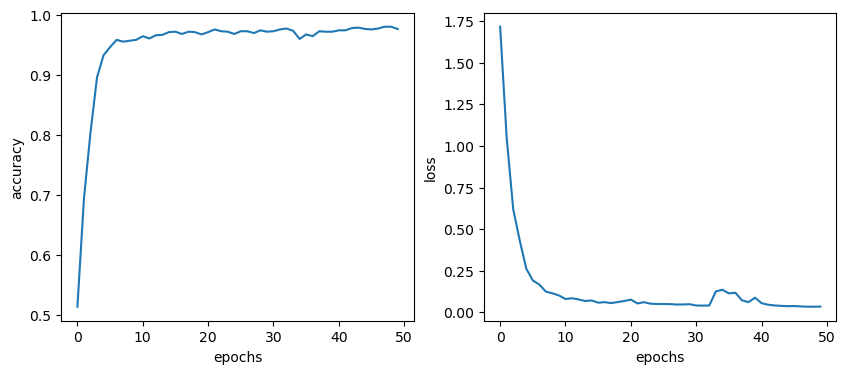

In [314]:
fig,ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')

plt.show()

In [315]:
prediction = model_ANN.predict(X_test.toarray())

11/11 [==============================] - 0s 7ms/step


In [316]:
prediction = [np.argmax(i) for i in prediction]

In [317]:
accuracy_score(prediction,Y_test)

0.6566265060240963

In [318]:
confusion_matrix(Y_test,prediction)

array([[137,   0,   7,  21,   1,  12],
       [  0,   4,   5,   1,   0,   0],
       [ 11,   1,   4,   4,   1,   1],
       [ 20,   0,   0,  61,   1,   2],
       [  5,   0,   1,   1,   2,   1],
       [ 13,   0,   1,   4,   0,  10]], dtype=int64)

In [319]:
pd.DataFrame(classification_report(Y_test,prediction,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.736559,0.800000,0.222222,0.663043,0.400000,0.384615,0.656627,0.534407,0.645968
recall,0.769663,0.400000,0.181818,0.726190,0.200000,0.357143,0.656627,0.439136,0.656627
f1-score,0.752747,0.533333,0.200000,0.693182,0.266667,0.370370,0.656627,0.469383,0.647550
support,178.000000,10.000000,22.000000,84.000000,10.000000,28.000000,0.656627,332.000000,332.000000


### Tfidf Model

In [320]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf,df['Label'],random_state=42,test_size=0.2)

In [321]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train.toarray(), Y_train, epochs=30)

Epoch 1/30
42/42 [==============================] - 1s 9ms/step - loss: 1.6742 - accuracy: 0.4491
Epoch 2/30
42/42 [==============================] - 0s 9ms/step - loss: 1.2340 - accuracy: 0.5170
Epoch 3/30
42/42 [==============================] - 0s 9ms/step - loss: 0.9964 - accuracy: 0.6707
Epoch 4/30
42/42 [==============================] - 0s 10ms/step - loss: 0.7275 - accuracy: 0.7634
Epoch 5/30
42/42 [==============================] - 0s 10ms/step - loss: 0.4811 - accuracy: 0.8485
Epoch 6/30
42/42 [==============================] - 0s 10ms/step - loss: 0.3170 - accuracy: 0.9133
Epoch 7/30
42/42 [==============================] - 0s 10ms/step - loss: 0.2111 - accuracy: 0.9472
Epoch 8/30
42/42 [==============================] - 0s 10ms/step - loss: 0.1570 - accuracy: 0.9510
Epoch 9/30
42/42 [==============================] - 0s 9ms/step - loss: 0.1248 - accuracy: 0.9661
Epoch 10/30
42/42 [==============================] - 0s 9ms/step - loss: 0.1109 - accuracy: 0.9616
Epoch 11/30
42

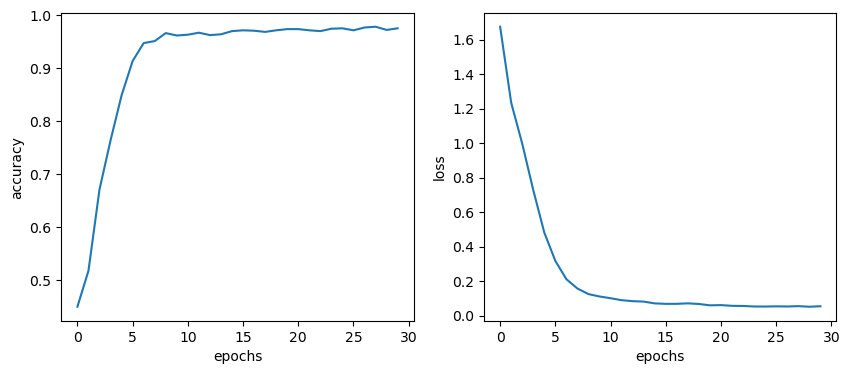

In [322]:
fig,ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')

plt.show()

In [323]:
prediction = model.predict(X_test.toarray())

11/11 [==============================] - 0s 5ms/step


In [324]:
prediction = [np.argmax(i) for i in prediction]

In [325]:
accuracy_score(prediction,Y_test)

0.6295180722891566

In [326]:
confusion_matrix(Y_test,prediction)

array([[143,   0,   8,  17,   2,   8],
       [  1,   3,   4,   2,   0,   0],
       [ 12,   1,   4,   3,   0,   2],
       [ 29,   0,   1,  51,   3,   0],
       [  6,   0,   1,   1,   2,   0],
       [ 16,   0,   0,   5,   1,   6]], dtype=int64)

In [327]:
pd.DataFrame(classification_report(Y_test,prediction,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.690821,0.750000,0.222222,0.645570,0.250000,0.375000,0.629518,0.488936,0.610190
recall,0.803371,0.300000,0.181818,0.607143,0.200000,0.214286,0.629518,0.384436,0.629518
f1-score,0.742857,0.428571,0.200000,0.625767,0.222222,0.272727,0.629518,0.415357,0.612462
support,178.000000,10.000000,22.000000,84.000000,10.000000,28.000000,0.629518,332.000000,332.000000


### Word2Vec Model

In [328]:
X_train, X_test, Y_train, Y_test = train_test_split(wordvec_df,df['Label'],random_state=42,test_size=0.2)

In [329]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 2ms/step - loss: 1.5609 - accuracy: 0.4785
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 1.2513 - accuracy: 0.5546
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1024 - accuracy: 0.5916
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0126 - accuracy: 0.6383
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.6579
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.9123 - accuracy: 0.6714
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.6820
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.7023
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.7054
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.7827 - accuracy: 0.7174
Epoch 11/

42/42 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9525
Epoch 84/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.9525
Epoch 85/100
42/42 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9593
Epoch 86/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.9586
Epoch 87/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9623
Epoch 88/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9601
Epoch 89/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9638
Epoch 90/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9586
Epoch 91/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9570
Epoch 92/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9631
Epoch 93/100


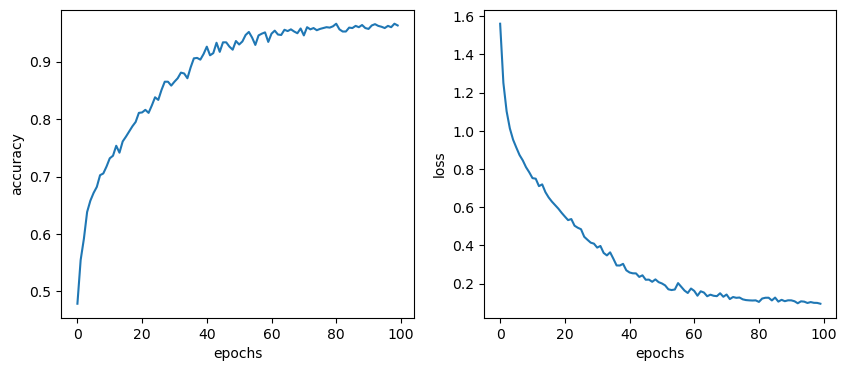

In [330]:
fig,ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')

plt.show()

In [331]:
prediction = model.predict(X_test)

prediction = [np.argmax(i) for i in prediction]

11/11 [==============================] - 0s 2ms/step


In [332]:
accuracy_score(prediction,Y_test)

0.6325301204819277

In [333]:
confusion_matrix(prediction,Y_test)

array([[139,   0,   4,  25,   5,  15],
       [  0,   6,   2,   2,   0,   1],
       [ 10,   2,   6,   4,   2,   1],
       [ 13,   2,   5,  47,   0,   1],
       [  4,   0,   2,   3,   3,   1],
       [ 12,   0,   3,   3,   0,   9]], dtype=int64)

In [334]:
pd.DataFrame(classification_report(prediction,Y_test,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.780899,0.600000,0.272727,0.559524,0.300000,0.321429,0.63253,0.472430,0.635100
recall,0.739362,0.545455,0.240000,0.691176,0.230769,0.333333,0.63253,0.463349,0.632530
f1-score,0.759563,0.571429,0.255319,0.618421,0.260870,0.327273,0.63253,0.465479,0.631767
support,188.000000,11.000000,25.000000,68.000000,13.000000,27.000000,0.63253,332.000000,332.000000


#### Achieved Highest accuracy of 65.56% using ANN with BoW Model

# RNN - LSTM

In [335]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [336]:
max_words = 20000
embedding_dimension = 200

In [337]:
tokenizer = Tokenizer()

In [338]:
tokenizer.fit_on_texts(df['Final_Body'].values)

In [339]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17249 unique tokens.


In [340]:
X = tokenizer.texts_to_sequences(df['Final_Body'].values)

In [341]:
X = pad_sequences(X, maxlen=200)

In [342]:
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1659, 200)


In [343]:
Y =df['Label']

In [344]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1327, 200) (1327,)
(332, 200) (332,)


In [345]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=200))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(7, activation='softmax'))

In [346]:
model_LSTM.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          2208000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_57 (Dense)            (None, 128)               16512     
                                                                 
 dense_58 (Dense)            (None, 7)                 903       
                                                                 
Total params: 2,356,999
Trainable params: 2,356,999
Non-trainable params: 0
_________________________________________________________________


In [347]:
model_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [348]:
history = model_LSTM.fit(X_train, Y_train, epochs=40)

Epoch 1/40
42/42 [==============================] - 13s 261ms/step - loss: 1.4869 - accuracy: 0.5290
Epoch 2/40
42/42 [==============================] - 10s 234ms/step - loss: 1.1130 - accuracy: 0.6436
Epoch 3/40
42/42 [==============================] - 10s 238ms/step - loss: 0.8363 - accuracy: 0.7099
Epoch 4/40
42/42 [==============================] - 10s 230ms/step - loss: 0.6397 - accuracy: 0.7626
Epoch 5/40
42/42 [==============================] - 9s 225ms/step - loss: 0.4875 - accuracy: 0.8395
Epoch 6/40
42/42 [==============================] - 10s 250ms/step - loss: 0.3903 - accuracy: 0.8749
Epoch 7/40
42/42 [==============================] - 10s 245ms/step - loss: 0.2954 - accuracy: 0.9005
Epoch 8/40
42/42 [==============================] - 10s 232ms/step - loss: 0.2583 - accuracy: 0.9148
Epoch 9/40
42/42 [==============================] - 10s 228ms/step - loss: 0.2320 - accuracy: 0.9239
Epoch 10/40
42/42 [==============================] - 10s 227ms/step - loss: 0.2014 - accurac

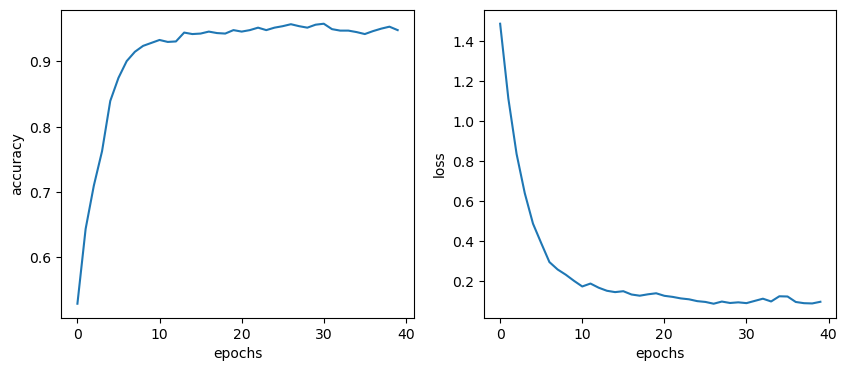

In [349]:
fig,ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')

plt.show()

In [350]:
prediction = model_LSTM.predict(X_test)

prediction = [np.argmax(i) for i in prediction]

11/11 [==============================] - 2s 79ms/step


In [351]:
accuracy_score(Y_test,prediction)

0.5993975903614458

# TEST

In [275]:
from helpfunc import *

In [276]:
test = ['12174','54531','54544','55210','62637','115773','128825','175204','176609']

In [352]:
dir = 'C:\\Users\\ishar\\Documents\\Projects\\Vlabs\\enron_with_categories\\Test\\'
name = str(test[6])
text_file = name +'.txt'
key=text_file
temp=[key]
content = ""
if text_file.endswith('.txt'):
    with open(os.path.join(dir, text_file), 'r') as file:
        content = file.read()
cat_path = name +'.cats'
with open(os.path.join(dir,cat_path),'r') as file:
    cat_content = file.read()

In [353]:
data= load_data(content,cat_content,temp)

In [354]:
body = data[0]
cat = data[1]

In [355]:
def prediction(body,cat):
    tokenized_body = body.split()
    test_bow = bow_vectorizer.transform([body])
    test_tfidf = tfidf_vectorizer.transform([body])
    test_w2v = word_vector(tokenized_body,200)
    
    xtest = tokenizer.texts_to_sequences([body])
    test_LSTM = pad_sequences(xtest,200)
    
    prediction_LR = logmodel_LR.predict(test_bow)
    prediction_NB = model_BNB.predict(test_w2v)
    prediction_RF = model_RF.predict(test_bow)
    prediction_KNN = model_KNN.predict(test_tfidf)
    prediction_ANN = model_ANN.predict(test_bow)
    prediction_ANN = np.argmax(prediction_ANN)
    prediction_LSTM = model_LSTM.predict(test_LSTM)
    prediction_LSTM = np.argmax(prediction_LSTM)
    print(f"Logistic Regression:        Actual: {cat},     Predicted: {prediction_LR[0]}")
    print(f"Naive Bayes:                Actual: {cat},     Predicted: {prediction_NB[0]}")
    print(f"Random Forest:              Actual: {cat},     Predicted: {prediction_RF[0]}")
    print(f"K Nearest Neigbhours:       Actual: {cat},     Predicted: {prediction_KNN[0]}")
    print(f"Artificial Neural Networks: Actual: {cat},     Predicted: {prediction_ANN}")
    print(f"RNN-LSTM:                   Actual: {cat},     Predicted: {prediction_LSTM}")
    print(' ')
    
    overall_predictions = [prediction_LR[0], prediction_NB[0], prediction_RF[0], prediction_KNN[0], prediction_ANN, prediction_LSTM ]
    prediction_set = list(set(overall_predictions))
    temp=[]
    for element in prediction_set:
        count=0
        for i in range(len(overall_predictions)):
            if overall_predictions[i]==element:
                count+=1
        temp.append(count)
    pred = prediction_set[temp.index(max(temp))]
    print(f"Overall Prediction: Actual:{cat}, Prediction:{pred}")
    
    
    return pred

In [356]:
final_pred = prediction(body,cat)

1/1 [==============================] - 0s 30ms/step
Logistic Regression:        Actual: 1,     Predicted: 1
Naive Bayes:                Actual: 1,     Predicted: 4
Random Forest:              Actual: 1,     Predicted: 1
K Nearest Neigbhours:       Actual: 1,     Predicted: 1
Artificial Neural Networks: Actual: 1,     Predicted: 1
RNN-LSTM:                   Actual: 1,     Predicted: 1
 
Overall Prediction: Actual:1, Prediction:1


In [357]:
categories = {
        1: 'Company Business, Strategy, etc',
        2: 'Purely Personal',
        3: 'Personal but in professional context',
        4: 'Logistic Arrangements (meeting scheduling, technical support, etc)',
        5: 'Employment arrangements (job seeking, hiring, recommendations, etc)',
        6: 'Document editing/checking (collaboration)'
                }

In [358]:
print(f"EMAIL BODY: {body}\n CATEGORY: {cat}\n ACTUAL LABEL: {categories[cat]}\n PREDICTION: {final_pred}\n PREDICTED LABEL: {categories[final_pred]}")

EMAIL BODY: legal privileg confidenti commun attorney client commun attorney work product privileg assert attach memo prepar rick refund case origin messag alvarez sent thursday septemb comn alan walton steve mara susan lawner lesli cantrel rebecca fulton donna dasovich jeff nicolay christi steff jame allen phillip nosk linda perrino dave black frank robert miller stephani tycholiz barri novosel sarah thome jennif hall steve legal lindberg susan western wholesal activ power conf call privileg confidenti commun attorney client commun attorney work product privileg assert alvarez unabl host call morn sinc must attend hear refund proceed pleas proceed call absenc thank pleas mark calendar date everi thursday time pacif central eastern time number host code particip code everyon tabl ferc issu proceed avail team member drive pleas feel free revis updat tabl appropri propos agenda today settlement redesign imbal energi agreement ferc sponsor reliabl meet caiso offic refund proceed statu ple